<b>Chatbot</b> merupakan bagian dari Natural Language Processing yang digunakan untuk percakapan dengan pengguna melalui teks dan ucapan. Pada proyek ini kami akan membuat sebuah chat otomatis atau chatbot tentang ZISWAF.

Dalam tahapan Chatbot ini ada tahapan yang harus kita perhatikan yaitu,

1. Import Library
2. Load Dataset
3. Preprocessing Data
4. Input Length, Output Length and Vocabulary
5. Neural Network Model
6. Model Analysis
7. Testing
8. Save Model

# **Import Library**

Tahapan pertama sebelum melakukan eksplorasi dan praproses pada data adalah memasukan library yang akan digunakan untuk menganalisa dataset dengan menggunakan metode Deep Learning seperti Neural Network dalam pengolahan teks, Chatbot dll. Library yang saya gunakan yaitu NumPy untuk komputasi matematika, Matplotlib untuk visualisasi model data, Natural Language Toolkit atau NLTK untuk pengolahan teks, Pandas untuk membaca data, serta Tensorflow untuk model pada data menggunakan algoritma LSTM dan Jaringan Syaraf Tiruan (Neural Network).

In [1]:
# Import Libraries
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

## **Download NLTK Package**

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **Load Dataset Json**

Setelah import library, tahapan selanjutnya adalah me-load dataset yang telah disediakan. Dataset yang digunakan berupa format **.json** yang sangat cocok untuk membuat model Chatbot. Data Json merupakan data yang termasuk dalam *semi structured* yang dimana data ini menampung beberapa bagian data seperti **tag**, **pattern**, **context**, dan **response**. Data yang dipakai dalam proyek ini menggunakan dataset manual yang diciptakan oleh student Kampus Merdeka Batch 2 tentang <b>Chatbot Sistem Rekomendasi Kampus Merdeka</b>. [Github](https://github.com/mahmudwhd/WebKadekBot)

In [3]:
# Importing the dataset
with open('/content/IslamicBot_Test.json') as content:
 data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [4]:
data

,patterns,tags
0,"Assalamu'alaikum, hallo",greeting
1,"Assalamu'alaikum, hai",greeting
2,Assalamu'alaikum,greeting
3,DPF itu apa?,seputar dpf
4,Apa itu Djalaluddin Pane Foundation?,seputar dpf
...,...,...
106,Apa saja yang bisa dilakukan dengan harta bend...,user_q53
107,Apa saja yang bisa dilakukan dengan harta bend...,user_q53
108,Bagaimana jika harta benda wakaf tidak lagi be...,user_q54
109,Apa saja kendala dalam pengembangan wakaf di I...,user_q55


In [5]:
data.head() # Cetak data baris pertama sampai baris kelima

,patterns,tags
0,"Assalamu'alaikum, hallo",greeting
1,"Assalamu'alaikum, hai",greeting
2,Assalamu'alaikum,greeting
3,DPF itu apa?,seputar dpf
4,Apa itu Djalaluddin Pane Foundation?,seputar dpf


In [6]:
data.tail() # Cetak data baris ke-70 sampai baris akhir

,patterns,tags
106,Apa saja yang bisa dilakukan dengan harta bend...,user_q53
107,Apa saja yang bisa dilakukan dengan harta bend...,user_q53
108,Bagaimana jika harta benda wakaf tidak lagi be...,user_q54
109,Apa saja kendala dalam pengembangan wakaf di I...,user_q55
110,Bagaimana upaya pemerintah dalam mengembangkan...,user_q56


Data yang telah kita miliki dalam format JSON yang dapat digunakan melalui pandas dengan cara konversi. Data JSON yang saya miliki didapat dengan cara manual dengan mengambil beberapa referensi website tentang program Kampus Merdeka.

# **Preprocessing The Data**

Setelah kita meload data dan mengonversi data json menjadi dataframe. Tahapan selanjutnya adalah praproses pada dataset yang kita gunakan saat ini yaitu dengan cara:

1.   Remove Punctuations (Menghapus Punktuasi)
2.   Lematization (Lematisasi)
3.   Tokenization (Tokenisasi)
4.   Apply Padding (Padding)
5.   Encoding the Outputs (Konversi Keluaran Enkoding)

## **Remove Punctuations**

Tahapan praproses pada data teks yang pertama adalah menghapus punktuasi atau tanda baca seperti *special character* yaitu **'!'** (**tanda seru**) **','** (**tanda koma**) **'.'** (**tanda titik sebagai berhenti**) '**?**' (**tanda tanya**) dan tanda baca yang lain. Tahapan ini gunanya untuk mempermudah pemrosesan data teks yang akan kita olah.

In [7]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))
data

,patterns,tags
0,assalamualaikum hallo,greeting
1,assalamualaikum hai,greeting
2,assalamualaikum,greeting
3,dpf itu apa,seputar dpf
4,apa itu djalaluddin pane foundation,seputar dpf
...,...,...
106,apa saja yang bisa dilakukan dengan harta bend...,user_q53
107,apa saja yang bisa dilakukan dengan harta bend...,user_q53
108,bagaimana jika harta benda wakaf tidak lagi be...,user_q54
109,apa saja kendala dalam pengembangan wakaf di i...,user_q55


## **Lemmatization (Lematisasi)**

Setelah menghapus punktuasi atau tanda baca, tahapan selanjutnya yaitu Lematisasi atau Lemmatization. **Apa itu Lematisasi?**

Lematisasi atau Lemmatization adalah proses dimana merujuk pada melakukan sesuatu menggunakan vocabulary atau kosakata dan analisis morfologi kata-kata untuk menghilangkan *inflectional endings only* dan untuk mengembalikan bentuk *dictionary* (kata dalam kamus) dari sebuah kata yang dikenal sebagai ***lemma***.

Contoh Lematisasi : **Menggunakan** (Kata Imbuhan) -> **Guna** (Kata Dasar)

Dalam contoh berikut proses lematisasi awalnya data teks menggunakan kata imbuhan yaitu **Menggunakan** dimana **meng-** + **guna** (kata dasar yang berawalan vokal g) + **kan** (sebagai akhiran) diubah menjadi kata dasar yaitu '**Guna**'.

Proses ini dimana menghilangkan Prefiks pada imbuhan (**Meng-**) dan Suffiks pada (**-kan**).

In [8]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)

173 unique lemmatized words [',', '-', 'ada', 'aja', 'antara', 'apa', 'apaan', 'apakah', "assalamu'alaikum", 'atau', 'bacaan', 'bagaimana', 'bagi', 'banyak', 'barang', 'batasan', 'bdhwwbfhbcfhfev', 'benda', 'bentuk', 'berapa', 'bergerak', 'berikan', 'bermanfaat', 'bertanya', 'besar', 'besaran', 'bidang', 'bisa', 'boleh', 'bye', 'cara', 'coba', 'contoh-contoh', 'cukup', 'dadah', 'dah', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'definisi', 'dengan', 'di', 'dianjurkan', 'dibuat', 'dijadikan', 'dikaluarkan', 'dikeluarkan', 'dilakukan', 'diluar', 'dimaksud', 'diperhatikan', 'disalurkan', 'diwakafkan', 'dizakati', 'djalaluddin', 'dong', 'dpf', 'dunia', 'dzikir', 'eeefddddvv', 'ekonomi', 'fitrah', 'foundation', 'fwfwedffddeef', 'ga', 'gimana', 'good', 'hai', 'hallo', 'harta', 'harus', 'hidup', 'hikmah', 'hukum', 'hukumnya', 'individu', 'indonesia', 'infaq', 'islam', 'itu', 'jasa', 'jelasin', 'jelaskan', 'jenis', 'jenis-jenis', 'jika', 'jumpa', 'kamu', 'kasih', 'keadilan', 'kendala', 'kepad

### **Menyortir Data Kelas Tags**

In [9]:
# sort classes
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

62 classes ['goodbye', 'greeting', 'penjelasan smart ziswaf', 'pertanyaan diluar ziswaf', 'pertanyaan random', 'seputar dpf', 'terimakasih', 'user_q1', 'user_q11', 'user_q12', 'user_q13', 'user_q14', 'user_q15', 'user_q16', 'user_q17', 'user_q18', 'user_q19', 'user_q2', 'user_q20', 'user_q21', 'user_q22', 'user_q23', 'user_q24', 'user_q25', 'user_q26', 'user_q27', 'user_q28', 'user_q29', 'user_q3', 'user_q30', 'user_q31', 'user_q32', 'user_q33', 'user_q34', 'user_q35', 'user_q36', 'user_q37', 'user_q38', 'user_q39', 'user_q4', 'user_q40', 'user_q41', 'user_q42', 'user_q43', 'user_q44', 'user_q45', 'user_q46', 'user_q47', 'user_q48', 'user_q49', 'user_q5', 'user_q50', 'user_q51', 'user_q52', 'user_q53', 'user_q54', 'user_q55', 'user_q56', 'user_q6', 'user_q7', 'user_q8', 'user_q9']


### **Mencari Jumlah Keseluruhan Data Teks**

In [10]:
# documents = combination between patterns and intents
print (len(documents), "documents")

337 documents


## **Tokenization (Tokenisasi)**

Setelah proses lematisasi dan mencari tahu data classes dan jumlah keseluruhan data patterns dengan intents-nya. Maka, tahapan selanjutnya proses tokenisasi. **Apa itu Tokenisasi?**

Tokenisasi adalah suatu proses memberikan urutan karakter dan sebuah unit dokumen terdefinisi. Tokenisasi juga merupakan tugas untuk memecah kalimat menjadi bagian-bagian yang disebut dengan '**Token**' dan menghilangkan bagian tertentu seperti tanda baca.

Contohnya: **Aku Pergi Ke Makassar** -> '**Aku**' '**Pergi**' '**Ke**' '**Makassar**'

In [11]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[36, 79],
 [36, 80],
 [36],
 [45, 13, 1],
 [1, 13, 81, 82, 83],
 [45, 84, 25, 85, 86, 28],
 [10, 46, 26, 6],
 [10, 3, 87, 26, 6],
 [10, 46, 26, 6],
 [26, 6, 88, 37, 89, 10],
 [26, 6, 37, 10, 16],
 [90, 37, 10],
 [91, 92],
 [93, 94],
 [47],
 [95],
 [96, 47],
 [38, 8],
 [38, 8, 48],
 [97, 49],
 [49],
 [98],
 [99, 100],
 [50, 51],
 [101],
 [50, 51, 52],
 [53, 39, 6],
 [20, 102, 39, 103, 6, 29, 16],
 [8, 53, 39, 6, 29],
 [104],
 [105],
 [106],
 [],
 [1, 3, 21, 11, 6],
 [6, 13, 107, 108, 1],
 [54, 55, 56, 6, 13, 1],
 [1, 3, 21, 11, 2],
 [2, 13, 1],
 [57, 2],
 [58, 2],
 [2, 13, 1, 16],
 [8, 30, 59, 17, 17, 2],
 [2, 8, 1, 28, 16],
 [109, 29, 2, 8, 30, 59],
 [17, 17, 2],
 [110, 6, 8, 29, 16],
 [14, 6, 8, 111],
 [7, 112, 60, 6, 25, 113, 114],
 [60, 6, 25, 40, 115],
 [1, 3, 21, 11, 2, 27, 61],
 [2, 13, 1, 116],
 [57, 2],
 [58, 2],
 [10, 4, 3, 31, 117, 2],
 [1, 4, 15, 3, 31, 118],
 [15, 3, 32, 119, 2, 8, 1, 28],
 [30, 120, 2, 3, 121, 122],
 [123, 2, 3, 62, 124, 13, 30, 52, 16],
 [41, 10, 2, 32, 

## **Padding**

Setelah memproses tokenisasi yang dimana memecah kalimat menajdi bagian-bagian yang disebut token yang digunakan untuk mengolah data teks pada AI Chatbot maka tahapan selanjutnya adalah Padding.
**Apa itu Padding?**

**Padding** adalah Suatu proses untuk mengubah setiap sequence agar memiliki panjang yang sama. Pada padding, setiap sequence dibuat sama panjang dengan menambahkan nilai 0 secara suffiks atau prefiks hingga mencapai panjang maksimum sequence. Selain itu padding juga dapat memotong sequence hingga panjangnya sesuai dengan panjang maksimum sequence.

Padding juga adalah proses untuk membuat setiap kalimat pada teks memiliki panjang yang seragam. Sama seperti melakukan resize gambar, agar resolusi setiap gambar sama besar. Untuk menggunakan padding bisa impor library **pad_sequence**. Kemudian buat panggil fungsi pad_sequence() dan masukkan sequence hasil tokenisasi sebagai parameternya.

Contohnya: `sequences_samapanjang = pad_sequences(sequences)`

Yang nantinya akan dikeluarkan menjadi angka dengan awalan 0

In [12]:
# Apply padding
x_train = pad_sequences(train)
print(x_train) # Padding Sequences

[[  0   0   0   0   0   0   0  36  79]
 [  0   0   0   0   0   0   0  36  80]
 [  0   0   0   0   0   0   0   0  36]
 [  0   0   0   0   0   0  45  13   1]
 [  0   0   0   0   1  13  81  82  83]
 [  0   0   0  45  84  25  85  86  28]
 [  0   0   0   0   0  10  46  26   6]
 [  0   0   0   0  10   3  87  26   6]
 [  0   0   0   0   0  10  46  26   6]
 [  0   0   0  26   6  88  37  89  10]
 [  0   0   0   0  26   6  37  10  16]
 [  0   0   0   0   0   0  90  37  10]
 [  0   0   0   0   0   0   0  91  92]
 [  0   0   0   0   0   0   0  93  94]
 [  0   0   0   0   0   0   0   0  47]
 [  0   0   0   0   0   0   0   0  95]
 [  0   0   0   0   0   0   0  96  47]
 [  0   0   0   0   0   0   0  38   8]
 [  0   0   0   0   0   0  38   8  48]
 [  0   0   0   0   0   0   0  97  49]
 [  0   0   0   0   0   0   0   0  49]
 [  0   0   0   0   0   0   0   0  98]
 [  0   0   0   0   0   0   0  99 100]
 [  0   0   0   0   0   0   0  50  51]
 [  0   0   0   0   0   0   0   0 101]
 [  0   0   0   0   0   0

In [13]:
x_train.shape

(111, 9)

## **Encoding Text**

Setelah tahapan proses Padding pada suatu teks maka proses terakhir dalam pemrosesan teks adalah tahapan Encoding. **Apa itu Encoding?**

Encoding merupakan suatu konversi atau pengkodean yang dimana data kategorik seperti huruf atau data teks menjadi data numerik atau angka menyesuaikan dengan data label yang digunakan. Pada proses tahapan ini, encoding mengubah data teks pada kolom data tags menjadi data numerik dengan bahasa biner komputer yaitu 0 dan 1.

Tujuan dari encoding ini adalah mempermudah saat proses komputasi data teks dan modelling.

In [14]:
# Encoding the outputs
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train) #Label Encodings

[ 1  1  1  5  5  5  2  2  2  2  2  2  0  0  0  0  0  0  0  0  0  6  6  6
  6  6  3  3  3  4  4  4  4  7  7  7 17 17 17 17 17 28 28 28 28 39 39 39
 39 50 50 50 50 58 59 59 60 60 61  8  9 10 10 10 11 12 13 13 14 15 16 18
 19 20 21 22 23 24 25 26 27 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44
 45 46 47 48 49 51 52 53 54 54 54 54 55 56 57]


Tokenizer pada Tensorflow memberikan token unik untuk setiap kata yang berbeda. Dan juga padding dilakukan untuk mendapatkan semua data dengan panjang yang sama sehingga dapat mengirimkannya ke lapisan atau layer RNN. variabel target juga dikodekan menjadi nilai desimal.

# **Input Length, Output Length and Vocabulary**



In [15]:
# input length
input_shape = x_train.shape[1]
print(input_shape)

9


In [16]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  171
output length:  62


**Input length** dan **output length** terlihat sangat jelas hasilnya. Mereka adalah untuk bentuk input dan bentuk output dari jaringan syaraf pada algoritma Neural Network.

**Vocabulary Size** adalah untuk lapisan penyematan untuk membuat representasi vektor unik untuk setiap kata.

# **Save Model Words & Classes**

In [17]:
pickle.dump(words, open('/content/Model/words.pkl','wb'))
pickle.dump(classes, open('/content/Model/classes.pkl','wb'))

## **Save Label Encoder & Tokenizer**

In [18]:
pickle.dump(le, open('/content/Model/le.pkl','wb'))
pickle.dump(tokenizer, open('/content/Model/tokenizers.pkl','wb'))

# **Neural Network Model**

Jaringan syaraf yang terdiri dari lapisan embedding yang merupakan salah satu hal yang paling kuat di bidang pemrosesan bahasa alami atau NLP. output atau keluaran dari lapisan embedding adalah input dari lapisan berulang (*recurrent*) dengan LSTM gate. Kemudian, output diratakan dan lapisan Dense digunakan dengan fungsi aktivasi softmax.

Bagian utama adalah lapisan embedding yang memberikan vektor yang sesuai untuk setiap kata dalam dataset.

In [19]:
# Creating the model (Membuat Modeling)
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i) # Layer Embedding
x = LSTM(50, return_sequences=True)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x)

# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

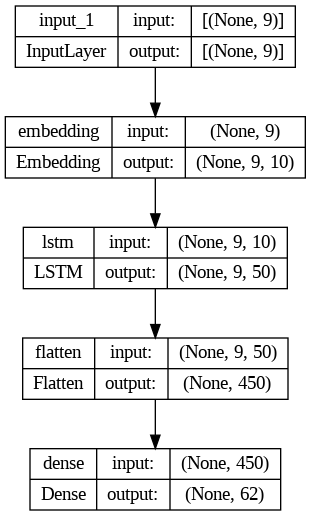

In [20]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='/content/model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
model.summary() # Menampilkan Parameter Model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 embedding (Embedding)       (None, 9, 10)             1720      
                                                                 
 lstm (LSTM)                 (None, 9, 50)             12200     
                                                                 
 flatten (Flatten)           (None, 450)               0         
                                                                 
 dense (Dense)               (None, 62)                27962     
                                                                 
Total params: 41882 (163.60 KB)
Trainable params: 41882 (163.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Training the model (Latih Model Data)
train = model.fit(x_train, y_train, epochs=300)

Epoch 1/300
4/4 [==============================] - 7s 346ms/step - loss: 4.1261 - accuracy: 0.0631
Epoch 2/300
4/4 [==============================] - 2s 393ms/step - loss: 4.1164 - accuracy: 0.0991
Epoch 3/300
4/4 [==============================] - 1s 286ms/step - loss: 4.1056 - accuracy: 0.1171
Epoch 4/300
4/4 [==============================] - 1s 160ms/step - loss: 4.0885 - accuracy: 0.0901
Epoch 5/300
4/4 [==============================] - 0s 72ms/step - loss: 4.0662 - accuracy: 0.0811
Epoch 6/300
4/4 [==============================] - 0s 84ms/step - loss: 4.0317 - accuracy: 0.0811
Epoch 7/300
4/4 [==============================] - 0s 8ms/step - loss: 3.9752 - accuracy: 0.0811
Epoch 8/300
4/4 [==============================] - 0s 87ms/step - loss: 3.8944 - accuracy: 0.0811
Epoch 9/300
4/4 [==============================] - 0s 8ms/step - loss: 3.7981 - accuracy: 0.0811
Epoch 10/300
4/4 [==============================] - 1s 164ms/step - loss: 3.7456 - accuracy: 0.0811
Epoch 11/300
4/4

# **Model Analysis**

Setelah menjalankan model fitting. Selanjutnya adalah analisa model untuk melihat hasil akurasi dari model Neural Network tersebut.

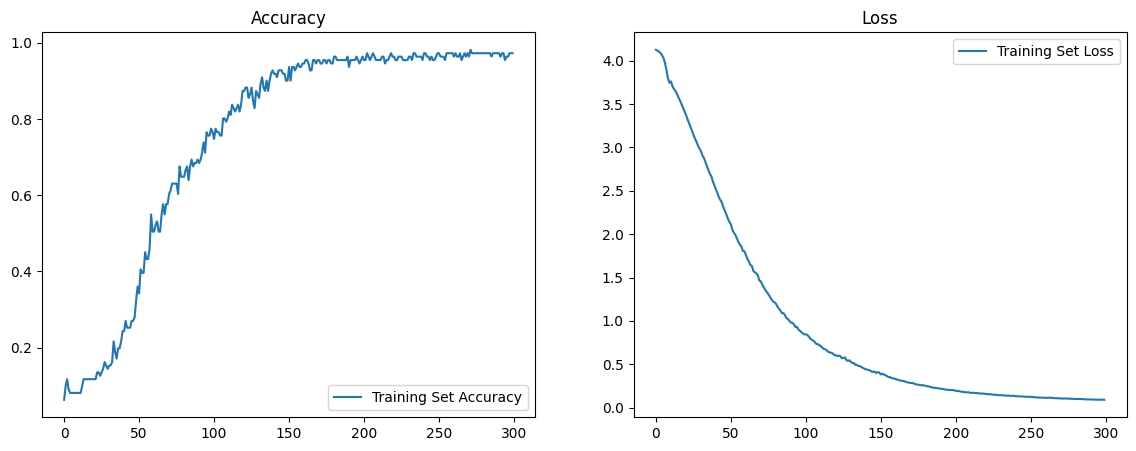

In [23]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

# **Testing Chatbot Dan Tambahkan Suara Pada Chatbot**

Setelah mengetahui hasil dari akurasi dan loss pada model yang telah ditetapkan dengan algoritma Neural Network dan LSTM. Maka, tahapan selanjutnya adalah menguji atau testing pada chatbot yang telah dilatih sebelumnya dan melihat apakah sesuai atau tidak pada saat kita masukan teks kalimat pertanyaannya.

Pada pengujian ini menggunakan metode input atau masukan sesuai dengan kalimat pertanyaan yang dimasukkan.

In [24]:
# Membuat Input Chat

while True:
    texts_p = []
    prediction_input = input('👨‍🦰 Kamu \t: ')
    # Menghapus punktuasi dan konversi ke huruf kecil
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    # Tokenisasi dan Padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)
    # Mendapatkan hasil keluaran pada model
    output = model.predict(prediction_input, verbose=0)
    output = output.argmax()
    response_tag = le.inverse_transform([output])[0]
    # Menemukan respon sesuai data tag dan memainkan voice bot
    print("\n👨‍💼 Islamic Bot :", random.choice(responses[response_tag]), "\n")
    # Tambahkan respon 'goodbye' agar bot bisa berhenti
    if response_tag == "goodbye":
        break

👨‍🦰 Kamu 	: Assalamualaikum

👨‍💼 Islamic Bot : Wa'alaikumsalam, Hallo! Perkenalkan Aku Smart Ziswaf, Ingin tau informasi tentang apa nih ? 

👨‍🦰 Kamu 	: Apa itu ZISWAF?

👨‍💼 Islamic Bot :  Wakaf adalah perbuatan hukum wakif untuk memisahkan dan/atau menyerahkan sebagian harta benda miliknya untuk dimanfaatkan kepentingan umum dan/atau untuk keperluan agama Islam berdasarkan syariah. 

👨‍🦰 Kamu 	: Terima kasih

👨‍💼 Islamic Bot : Alhamdulillah Dengan senang hati :) 

👨‍🦰 Kamu 	: Sampai jumpa

👨‍💼 Islamic Bot : Waalaikumsalam, terima kasih sudah berdiskusi dengan aku! 



# **Save The Model**

Setelah pengujian Chatbot telah disesuaikan dengan kalimat dan jawabannya. Maka, model chatbot bisa disimpan dengan format .h5 atau .pkl (pickle) untuk penggunaan aplikasi AI Chatbot dengan website atau sistem Android.

In [25]:
model.save('/content/Model/chat_model.h5')

print('Model Created Successfully!')

Model Created Successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
